## Now You Code In Class: Tricks of The DataViz Masters

We will try something a bit different in the Activity - A series of Data Visualization coding challenges!

Penguins and health exp tips
       
    


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import pandas as pd
import numpy as np
from IPython.display import display
from ipywidgets import interact_manual

## Let's load up some sample datasets:

- "penguins" The Palmer Penguins dataset: https://github.com/allisonhorst/palmerpenguins
- "tips" One waiter collected 244 data points about his tipping customers. https://rdrr.io/cran/reshape2/man/tips.html
- "healthexp" Life expectancy -vs- heath care expenditure. https://ourworldindata.org/grapher/life-expectancy-vs-health-expenditure

these are stored in Pandas dataframes. `pengo`, `health` and `tips` respectively.

In [15]:
pengo = sns.load_dataset("penguins")
tips = sns.load_dataset("tips")
health = sns.load_dataset("healthexp")
# add counts
pengo['count'] = 1
tips['count'] = 1

In [16]:
pengo.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,count
209,Chinstrap,Dream,49.3,19.9,203.0,4050.0,Male,1
274,Gentoo,Biscoe,46.5,14.4,217.0,4900.0,Female,1
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
283,Gentoo,Biscoe,54.3,15.7,231.0,5650.0,Male,1
269,Gentoo,Biscoe,45.2,15.8,215.0,5300.0,Male,1


In [17]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size,count
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
78,22.76,3.00,Male,No,Thur,Lunch,2,1
103,22.42,3.48,Female,Yes,Sat,Dinner,2,1
87,18.28,4.00,Male,No,Thur,Lunch,2,1
114,25.71,4.00,Female,No,Sun,Dinner,3,1


In [5]:
health.sample(5)

,Year,Country,Spending_USD,Life_Expectancy
204,2009,France,3880.842,81.5
7,1971,Great Britain,134.172,71.9
196,2008,Canada,3849.544,80.7
210,2010,France,4045.065,81.8
144,1999,France,2431.303,78.9


## Bar Plots: Counts

This code displays the number of penguins by species. Which species is most represented in the data set?

<Axes: xlabel='species', ylabel='count'>

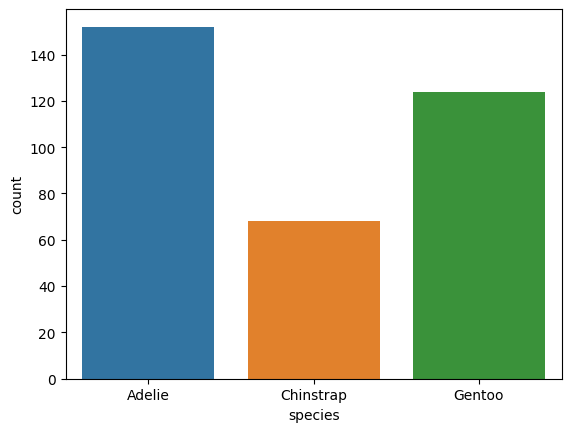

In [18]:
sns.barplot(data=pengo, x="species", y="count", hue="species", estimator="sum")

In [ ]:
# PROMPT 1
# Are there more males or females in the tips dataset?
# catagory M/F counting
sns.barplot(data=tips, x = "sex", y="count",estimator="sum")

In [21]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   count       244 non-null    int64   
dtypes: category(4), float64(2), int64(2)
memory usage: 9.3 KB


<Axes: xlabel='smoker', ylabel='count'>

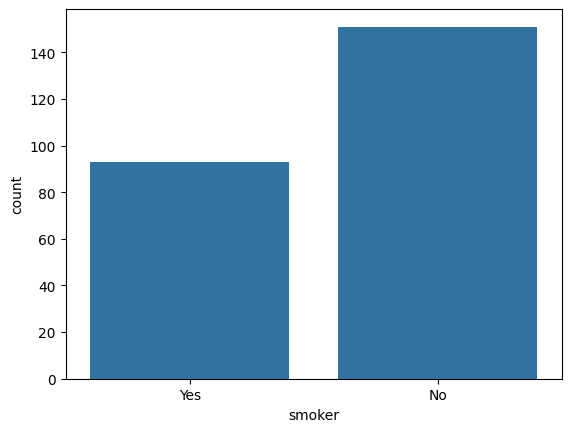

In [22]:
# PROMPT 2
# Are there more smokers or non-smokers in the tips dataset?
sns.barplot(data=tips, x = "smoker", y = "count", estimator="sum")

/tmp/ipykernel_101/2181394368.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = tips.groupby(['sex', 'smoker']).size().unstack()


<Axes: xlabel='smoker', ylabel='sex'>

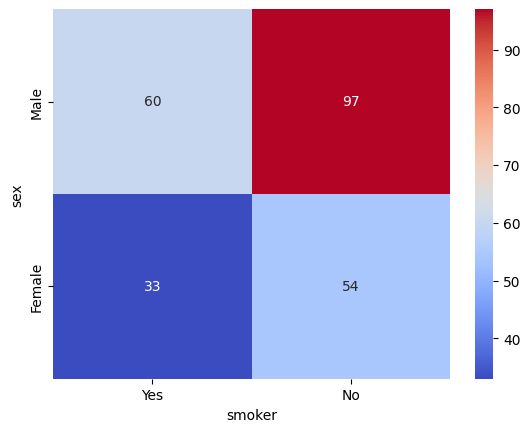

In [12]:
# Heatmap example
heatmap_data = tips.groupby(['sex', 'smoker']).size().unstack()
heatmap_data
# Create the heatmap
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')



## Bar Plots: Averages

This code displays the average penguin mass by species. The default `estimator='mean'`

<Axes: xlabel='species', ylabel='body_mass_g'>

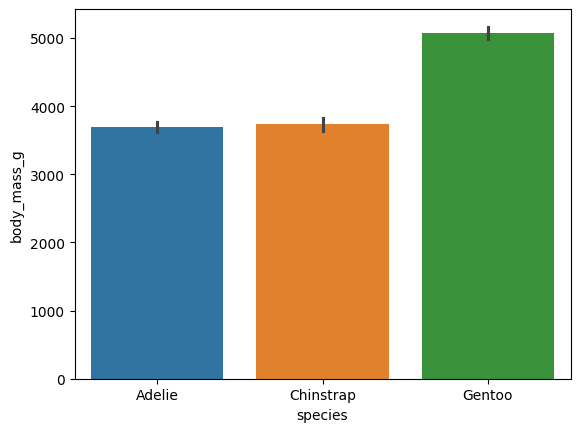

In [23]:
sns.barplot(data=pengo, x="species", y="body_mass_g", hue="species")

In [24]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   count       244 non-null    int64   
dtypes: category(4), float64(2), int64(2)
memory usage: 9.3 KB


<Axes: xlabel='tip', ylabel='sex'>

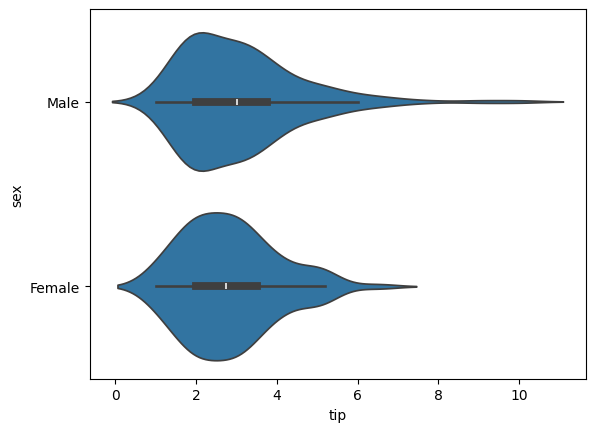

In [29]:
# PROMPT 3
# What is the average tip by gender?
#sns.barplot(data=tips, y="sex", x="tip", estimator="mean")
#sns.boxplot(data=tips, y="sex", x="tip")
sns.violinplot(data=tips, y="sex", x="tip")


<Axes: xlabel='smoker', ylabel='tip'>

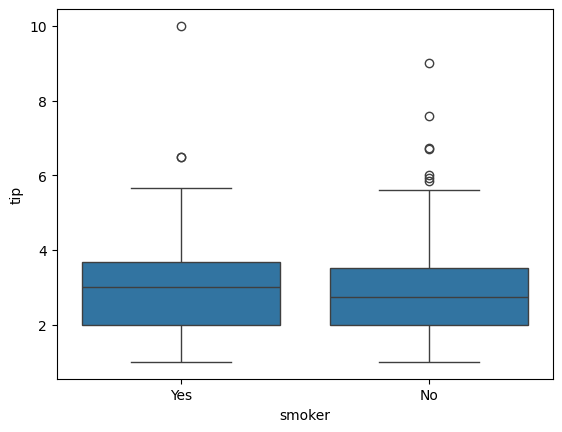

In [31]:
# PROMPT 4
# Who tips more smokers or non-smokers?
sns.boxplot(data=tips, x = "smoker", y="tip")

/tmp/ipykernel_101/682730680.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_group = tips.groupby(["sex","smoker"]).size().unstack()


<Axes: xlabel='smoker', ylabel='sex'>

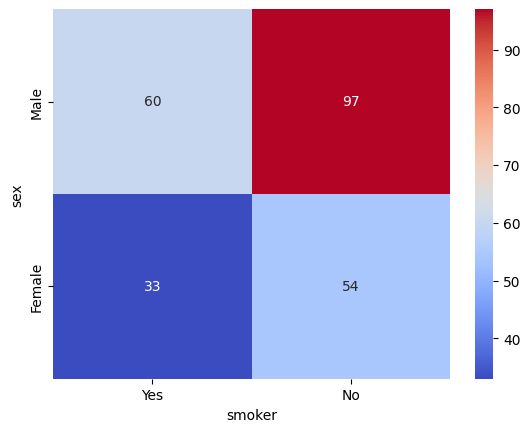

In [41]:
# this is for comparing two categories against each other
tip_group = tips.groupby(["sex","smoker"]).size().unstack()
sns.heatmap(data=tip_group, annot=True, cmap='coolwarm')

## Adding a Series to a bar plot

This code breaks down the penguin species mass by island. Which island has the most penguins? which species is dominant on each island?

<Axes: xlabel='species', ylabel='count'>

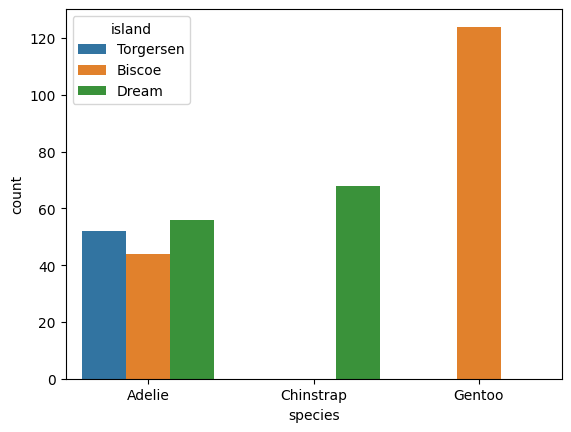

In [42]:
sns.barplot(data=pengo, x="species", y="count", hue="island", estimator="sum")

<Axes: xlabel='sex', ylabel='tip'>

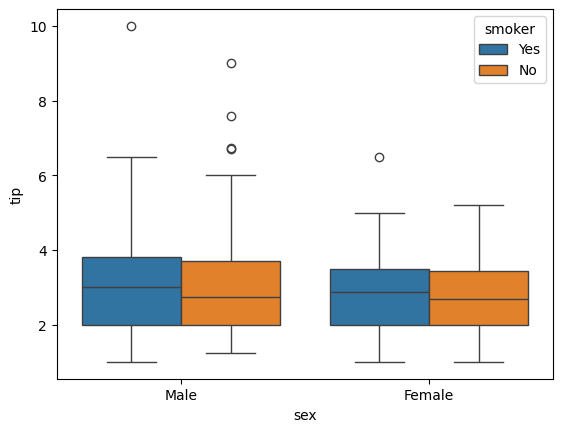

In [43]:
# PROMPT 5
# get a count of tips by sex and smoker
sns.boxplot(data=tips, x="sex", y="tip", hue="smoker")

<Axes: xlabel='day', ylabel='tip'>

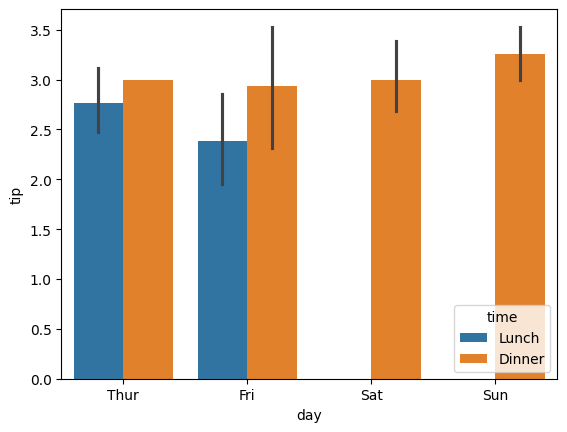

In [46]:
# PROMPT 6
# get a count of tips by day and time. Explain why the data appears as it does!
sns.barplot(data=tips, x="day", y="tip", hue="time") 

In [47]:
pengo.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,count
272,Gentoo,Biscoe,45.1,14.4,210.0,4400.0,Female,1


In [48]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size,count
223,15.98,3.0,Female,No,Fri,Lunch,3,1


## Scatter plots

What is the relationship between flipper length and bill length by species!

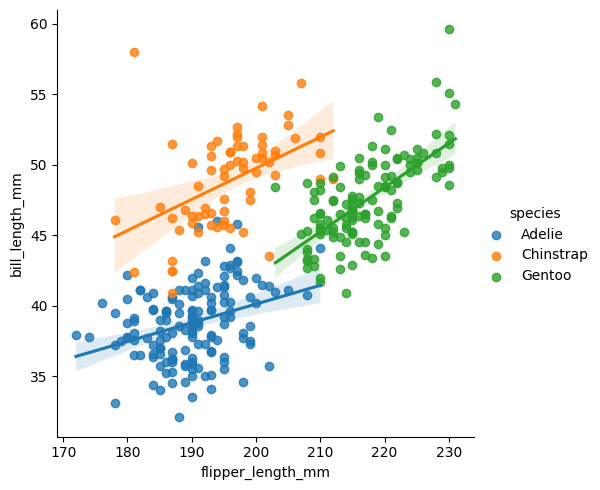

In [49]:
sns.lmplot(data=pengo, x="flipper_length_mm", y="bill_length_mm", hue="species")

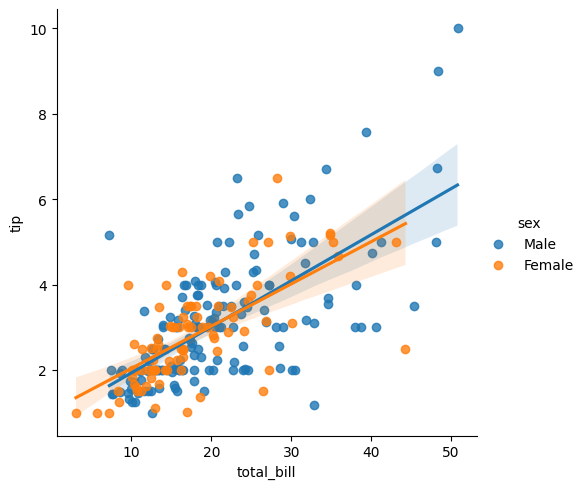

In [51]:
# PROMPT 7
# Show the relationship between bill and tip by gender
sns.lmplot(data=tips, x="total_bill", y="tip", hue="sex")

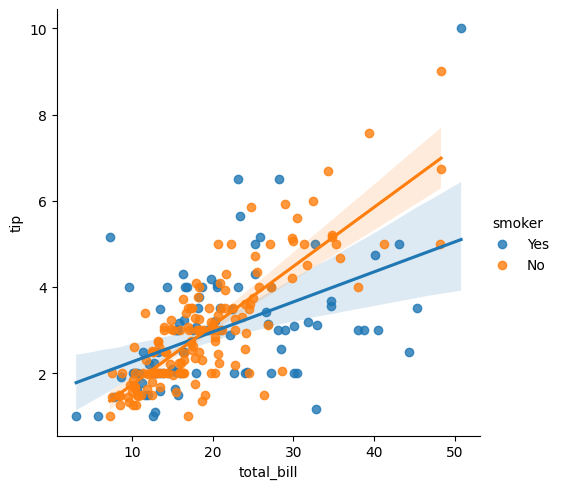

In [53]:
# PROMPT 8
# Show the relationship between bill and tip by smoker
sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker")

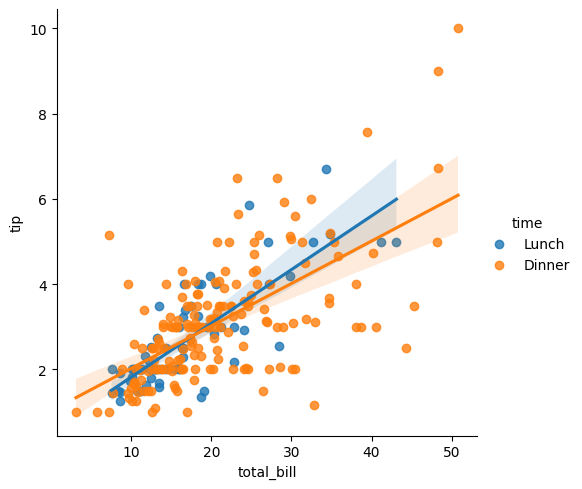

In [54]:
# PROMPT 9
# Show the relationship between bill and tip by lunch/dinner
sns.lmplot(data=tips, x = "total_bill", y="tip", hue="time")

In [55]:
pengo.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,count
238,Gentoo,Biscoe,46.2,14.5,209.0,4800.0,Female,1


In [56]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size,count
35,24.06,3.6,Male,No,Sat,Dinner,3,1


In [57]:
tips['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [58]:
tips[ tips['size'] == 1 ]

,total_bill,tip,sex,smoker,day,time,size,count
67,3.07,1.00,Female,Yes,Sat,Dinner,1,1
82,10.07,1.83,Female,No,Thur,Lunch,1,1
111,7.25,1.00,Female,No,Sat,Dinner,1,1
222,8.58,1.92,Male,Yes,Fri,Lunch,1,1


In [59]:
tips.sort_values("tip").tail(10)

,total_bill,tip,sex,smoker,day,time,size,count
88,24.71,5.85,Male,No,Thur,Lunch,2,1
239,29.03,5.92,Male,No,Sat,Dinner,3,1
47,32.40,6.00,Male,No,Sun,Dinner,4,1
183,23.17,6.50,Male,Yes,Sun,Dinner,4,1
214,28.17,6.50,Female,Yes,Sat,Dinner,3,1
141,34.30,6.70,Male,No,Thur,Lunch,6,1
59,48.27,6.73,Male,No,Sat,Dinner,4,1
23,39.42,7.58,Male,No,Sat,Dinner,4,1
212,48.33,9.00,Male,No,Sat,Dinner,4,1
170,50.81,10.00,Male,Yes,Sat,Dinner,3,1


In [60]:
tips['ratio'] =  tips['tip']  / tips['total_bill']

In [61]:
tips.sort_values('ratio').tail(10)

,total_bill,tip,sex,smoker,day,time,size,count,ratio
51,10.29,2.60,Female,No,Sun,Dinner,2,1,0.252672
221,13.42,3.48,Female,Yes,Fri,Lunch,2,1,0.259314
93,16.32,4.30,Female,Yes,Fri,Dinner,2,1,0.263480
149,7.51,2.00,Male,No,Thur,Lunch,2,1,0.266312
109,14.31,4.00,Female,Yes,Sat,Dinner,2,1,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,1,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,1,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,1,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,1,0.710345


In [ ]:
tips.describe()

<Axes: xlabel='size', ylabel='ratio'>

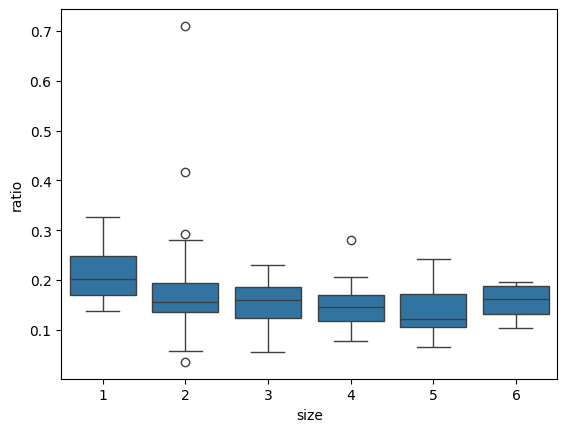

In [64]:
sns.boxplot(data=tips, x = "size", y = "ratio")

## Interact Example

This example allows the user to select two variables to compare from the following:

`['bill_length_mm;', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']`

it will then compare them using an `lmplot()` for each species. 


In [65]:
choices = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categories = ['species', 'island', 'sex']

@interact_manual(x=choices, y=choices, hue=categories)
def onclick(x, y, hue):
    sns.lmplot(data=pengo, x=x, y=y, hue=hue, markers="+")

interactive(children=(Dropdown(description='x', options=('bill_length_mm', 'bill_depth_mm', 'flipper_length_mm…

In [ ]:
# shdgafkja sgdfkjsgdaf jksgda fjksghdakfjgsadjkfg shda kjsghdaf kjsgdafhfjksghda fkjsghdfjkgdfsjkdafgkjsghdf
# 3 fjkdsghlkjsdfhgkljsfhdlkgj hsfdkljgh

### Prompt 10: Interact for tips

Among the following 4 Series:  

`['sex', 'smoker', 'day', 'time']`

Plot a bar of average tip `size`, allowing the user to choose which of the 4 series appears on the horizontal axis, and the other as part of the legend. Do not show the error bars


In [ ]:
sns.barplot(data=tips, x = choice, y="tip", estimator="mean")

In [ ]:
# PROMPT 10



## Timeseries Line Plots

Let's take another look at the `health` dataset. The last few challenges will use this dataset. Since it has a `Year` Series, it is suitable for line plots. 

In [66]:
health.sample(5)

,Year,Country,Spending_USD,Life_Expectancy
103,1992,Great Britain,930.701,76.3
128,1996,Japan,1436.372,80.3
2,1970,Great Britain,123.993,71.9
78,1987,USA,1976.166,74.9
50,1982,Great Britain,448.477,74.1


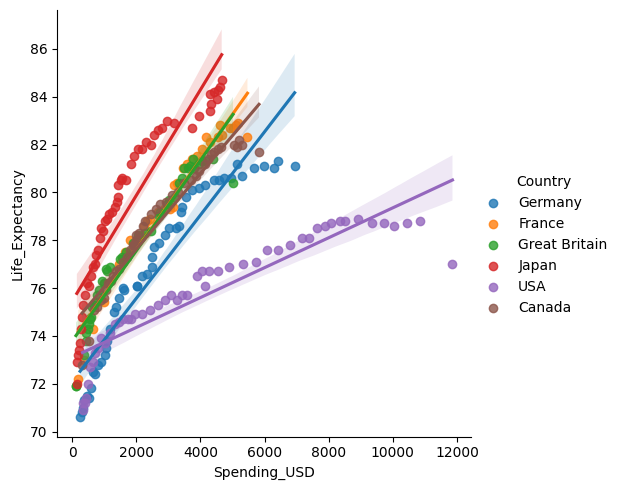

In [70]:
# PROMPT 11
# Plot average life expectancy for all countries by year
sns.lmplot(data=health, x = "Spending_USD", y="Life_Expectancy", hue="Country")

In [ ]:
# PROMPT 12
# # Plot average life expectancy by year, broken our for each country as a legend


## Final Plot

Figure out the best way to plot this:

Compare life expectancy to Spending. Show each country in the legend

In [ ]:
# PROMPT 13 Year	Country	Spending_USD	Life_Expectancy


In [ ]:
# run this code to turn in your work!
from casstools.assignment import Assignment
Assignment().submit()